In [1]:
import sys
sys.path.append('../spp')

In [2]:
from process import *
from test import *
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
def_pipe = DefaultPipeline("TSLA")
X_train, y_train, X_test, y_test = def_pipe.get_data()
y_train


    period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    
[*********************100%***********************]  1 of 1 completed


C:\Users\valer\Desktop\SPP\SPP\model\../spp\process.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i][attribute_name+"_LnProf"] = lnprofs


,Target
0,-0.003704
1,-0.007019
2,-0.129928
3,0.005791
4,-0.004548
...,...
185,-0.020825
186,-0.012581
187,0.047977
188,0.074574


In [3]:
regression = LinearRegression().fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

df = def_pipe.get_test_price(y_test_pred)

start_capital = 100000
tt = TraderTest(start_capital, df["Prediction_ExpProf"], df["Price_True"])
# tt = TraderTest(100000, [100, 150], [100, 150])
traded_capital = tt.trade()
print(f"Model earned {(traded_capital):.2f}$ starting from {start_capital}$")

Model earned 113244.94$ starting from 100000$


C:\Users\valer\Desktop\SPP\SPP\process.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_True"] = self.true_price_keeper[train_test_id].to_numpy()


In [4]:
def_pipe = BinarizedPipeline("TSLA")
X_train, y_train, X_test, y_test = def_pipe.get_data()

[*********************100%***********************]  1 of 1 completed


C:\Users\valer\Desktop\SPP\SPP\process.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["RSI"] = _rsi(dataframe)


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

0.5978835978835979 0.5957446808510638


C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


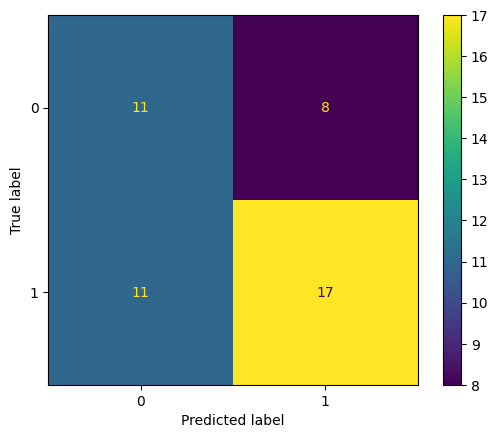

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [7]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, logreg.predict(X_test))
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.593


In [8]:
regression = LogisticRegression().fit(X_train, y_train)
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

df = def_pipe.get_test_price(y_test_pred)

start_capital = 100000
tt = TraderTest(start_capital, df["Prediction_ExpProf"], df["Price_True"])
# tt = TraderTest(100000, [100, 150], [100, 150])
traded_capital = tt.trade()
print(f"Model earned {(traded_capital):.2f}$ starting from {start_capital}$")

Model earned 153803.29$ starting from 100000$


C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\valer\Desktop\SPP\SPP\process.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [27]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    random_seed=42,
    iterations=20,
    learning_rate=0.05,
    boosting_type='Ordered',  # now faster, Ordered is better
    bootstrap_type='Bernoulli',  # 
    subsample=0.5,               # item2subsample probability
    rsm=1,
    leaf_estimation_iterations=5,
    max_ctr_complexity=1,
    leaf_estimation_method='Newton'
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [28]:
balanced_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.557


In [29]:
balanced_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.920


In [30]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

df = def_pipe.get_test_price(y_test_pred)

start_capital = 100000
tt = TraderTest(start_capital, df["Prediction_ExpProf"], df["Price_True"])
# tt = TraderTest(100000, [100, 150], [100, 150])
traded_capital = tt.trade()
print(f"Model earned {(traded_capital):.2f}$ starting from {start_capital}$")

Model earned 153018.30$ starting from 100000$


C:\Users\valer\Desktop\SPP\SPP\process.py:255: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_True"] = self.true_price_keeper[train_test_id].to_numpy()
